# Use case: K-Means for color Compression

Pixels are treated as 3D points in RGB space. K-means groups similar pixels into K clusters, where each cluster's centroid (average RGB value) becomes the single color representing all pixels in that group.
- Original: 96,615 unique colors × 3 bytes = ~290KB color data
- K=64: 64 colors × 3 bytes + 1 byte/pixel = ~1/3 original size


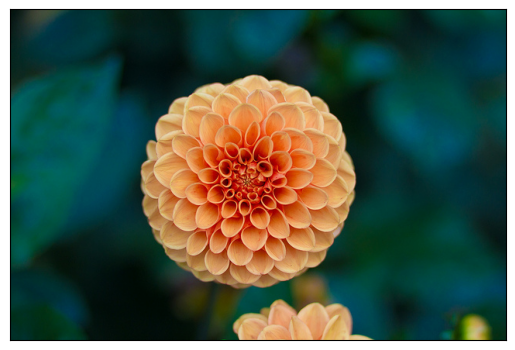

In [24]:
import numpy as np
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt

#load_sample_image is meant for names of the built‑in demo images (like "china.jpg")
china=load_sample_image("flower.jpg")
ax=plt.axes(xticks=[],yticks=[])
ax.imshow(china);

In [25]:
china.shape

# means this is 427 by 640 pixels wth 3 RGB layers)

(427, 640, 3)

In [26]:
china

array([[[ 2, 19, 13],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 1, 77, 64],
        [ 0, 76, 64],
        [ 0, 75, 63]],

       [[ 1, 18, 12],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 0, 76, 64],
        [ 1, 74, 65],
        [ 1, 74, 65]],

       [[ 2, 17, 12],
        [ 6, 19, 12],
        [ 7, 20, 13],
        ...,
        [ 1, 74, 65],
        [ 1, 74, 67],
        [ 1, 74, 67]],

       ...,

       [[ 0, 46, 40],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 5, 44, 26],
        [ 6, 43, 26],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 6, 45, 27],
        [ 7, 44, 27],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 0, 46, 36],
        ...,
        [ 7, 46, 28],
        [ 8, 45, 28],
        [ 9, 43, 27]]], shape=(427, 640, 3), dtype=uint8)

In [27]:
# These value are large so we arenormalizing them into  and 1. and way to do that is divide by 255.

data=china/255.0
data=data.reshape(427*640,3) # USING reshape we converted 3 dimensional into 2 dimensional
data.shape

(273280, 3)

In [28]:
data
# Now the values are between  0 AND 1. 

array([[0.00784314, 0.0745098 , 0.05098039],
       [0.01176471, 0.07058824, 0.05098039],
       [0.02745098, 0.07843137, 0.05098039],
       ...,
       [0.02745098, 0.18039216, 0.10980392],
       [0.03137255, 0.17647059, 0.10980392],
       [0.03529412, 0.16862745, 0.10588235]], shape=(273280, 3))

In [36]:
# visualizing the data using 10,000 points

def plot_pixels(data,title,colors=None,N=10000):
    if colors is None:
        colors=data

    # choosing a random subset
    rng=np.random.RandomState(0)
    i=rng.permutation(data.shape[0])[:N]
    colors=colors[i]
    R,G,B=data[i].T

    fig,ax=plt.subplots(1,2,figsize=(16,6))
    ax[0].scatter(R,G, color=colors,marker=".")
    ax[0].set(xlabel="Red",ylabel="Blue",xlim=(0,1),ylim=(0,1))

    ax[1].scatter(R,B,color=colors,marker=".")
    ax[1].set(xlabel="Red",ylabel="Green",xlim=(0,1),ylim=(0,1))

    fig.suptitle(title,size=20)


### Defining function
- title is a string that will be used as the figure title.
- colors=None is an optional argument. If the caller does not pass colors, it defaults to None
- N=10000 is another optional argument: by default the function will use at most 10,000 pixels.

#### Choosing a random Subset
- If no colors are provided, the function sets colors = data, meaning it will use each pixel’s RGB value as its own color when plotting.
- rng = np.random.RandomState(0) creates a random number generator with a fixed seed 0
- Using a fixed seed makes the “random” selection reproducible: we get the same random subset every time.

- data.shape[0] is the number of rows in data (i.e., number of pixels).
- rng.permutation(data.shape[0]) returns a random permutation of the indices 0, 1, 2, ..., num_pixels-1.
- [:N] takes the first N indices from that permutation, so i is a 1D array of randomly chosen row indices, at most N of them.0

- R, G, B = ... unpacks the three rows into three variables:
    1. R is a 1D array of all red values.
    2. G is a 1D array of all green values.
    3. B is a 1D array of all blue values.

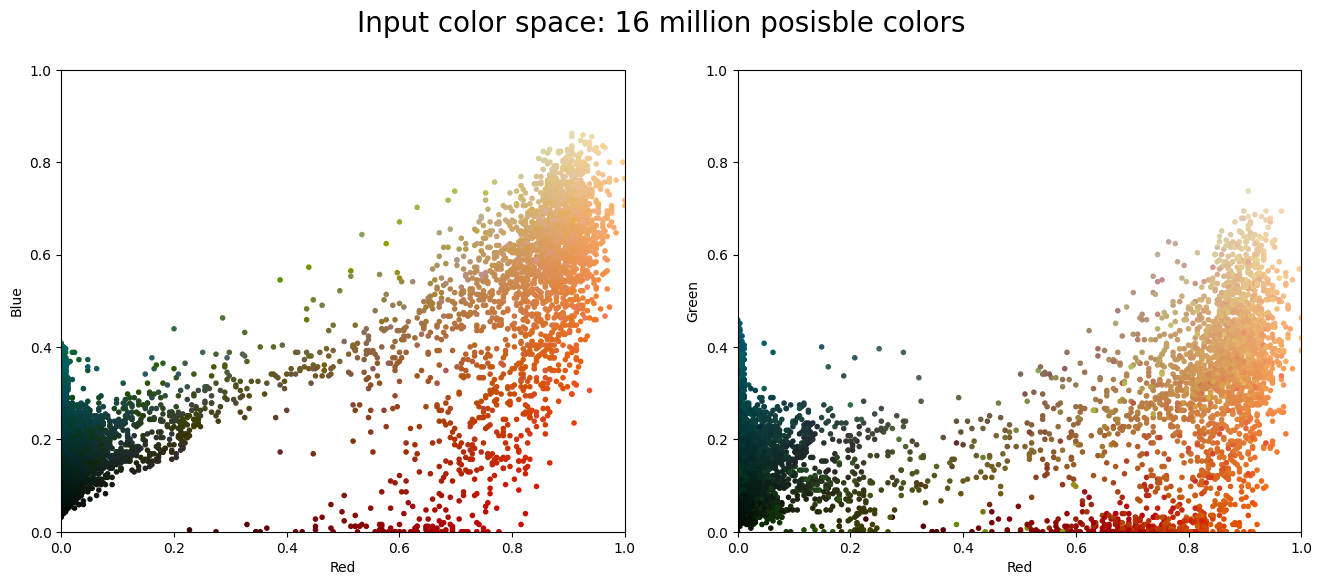

In [37]:
plot_pixels(data, title="Input color space: 16 million posisble colors")

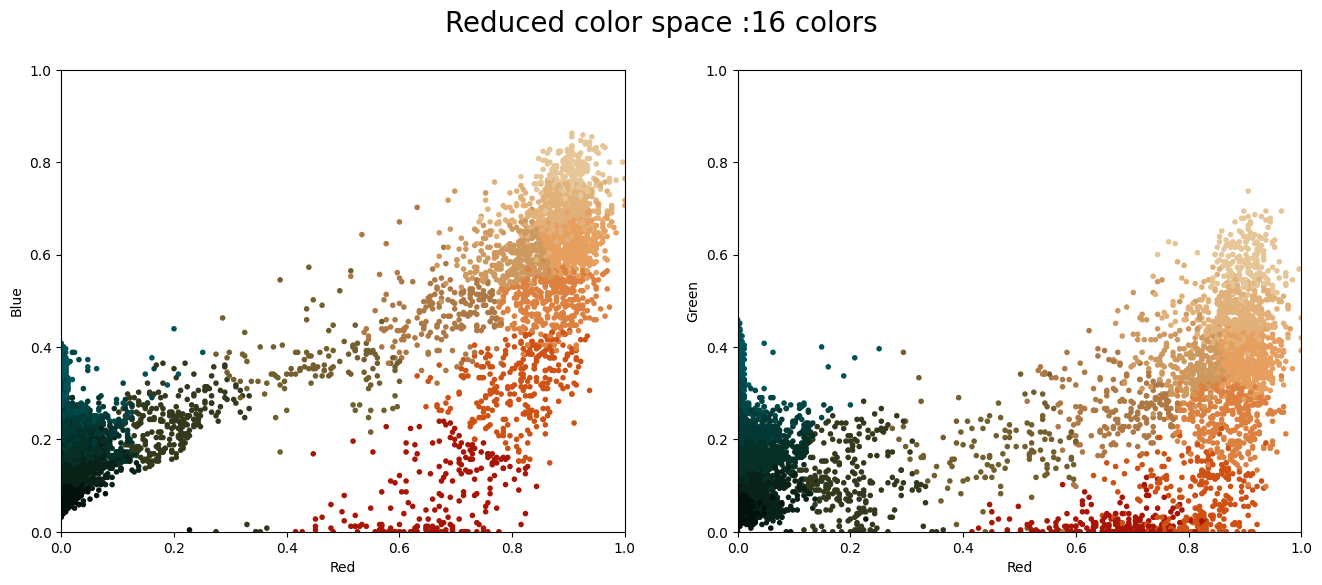

In [ ]:
# Fix numpy issues

import warnings; warnings.simplefilter("ignore")

from sklearn.cluster import MiniBatchKMeans
# Create clusterer for 16 color centroids 
kmeans=MiniBatchKMeans(16) #Faster than regular KMeans for large images 
kmeans.fit(data) 
new_colors=kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixels(data, colors=new_colors, title="Reduced color space :16 colors")

The plot reveals how 16 colors capture the image's essence—clusters form around dominant hues, empty space shows unused colors eliminated for compression.

Note:
- 16 is a practical starting point for color quantization that achieves good compression while maintaining acceptable visual quality.

Text(0.5, 1.0, '16_color Image')

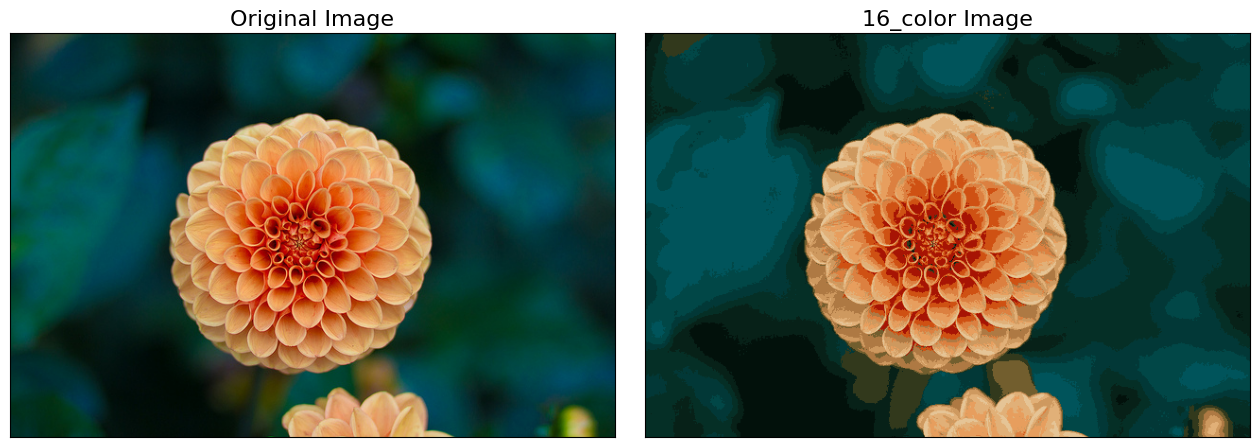

In [39]:
china_recolored=new_colors.reshape(china.shape)

fig,ax=plt.subplots(1,2,figsize=(16,6), subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title("Original Image",size=16)
ax[1].imshow(china_recolored)
ax[1].set_title("16_color Image", size=16)

File size: ~75-85% reduction (3 bytes/pixel → 0.5 bytes/pixel + tiny palette)
Visual quality: Good for flowers (distinct hues preserved, minor blending in gradients)